In [2]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
%matplotlib inline


[[ 0.65799448  0.37136087  0.72993446  0.84464026  0.59417956]
 [ 0.11230287  0.08618824  0.43154966  0.48056837  0.23297076]
 [ 0.01156493  0.35768324  0.8125595   0.86509748  0.23163473]
 [ 0.31766998  0.61137565  0.35725936  0.50359189  0.44980414]
 [ 0.58184431  0.84243714  0.65516545  0.67432937  0.4222521 ]]


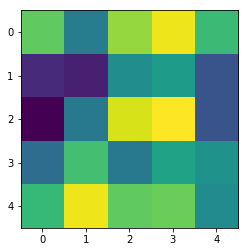

In [5]:

a = np.random.rand(5,5)
print(a)
plt.imshow(a,interpolation='nearest')
plt.show()
#plt.imshow(a)


In [17]:
# sigmoid 함수
def act(x):
    return 1/(1+np.exp(-x))

# sigmoid 미분함수
def actb(x):
    return act(x)*(1-act(x))

#학습 데이터
x = np.array([1,0.5,0.8],ndmin=2).T
y = np.array([0.1,0.9,0.3],ndmin=2).T

print("input  : \n",x)

# 가중치
W1 = np.random.normal(0.0,pow(3,0.5),size=(3,3))
W2 = np.random.normal(0.0,pow(3,0.5),size=(3,3))

# 학습률
lr = 0.1

# 합한값
a1 = np.dot(W1,x)
print(a1)

# active 함수 적용
s1 = act(a1)
print(s1)

# 합한값
a2 = np.dot(W2,s1)
print(a2)

# active 함수 적용 (결과)
s2 = act(a2)
print("output : \n",s2)

# 에러값
e = y-s2
print("error  : \n",e)

# 에러 분배
ea2 = np.dot(W2.T,e)
print(ea2)

# 에러 active 미분 함수 적용
es2 = lr*np.dot((e*s2*(1.0 - s2)),s1)
print(es2)

input  : 
 [[ 1. ]
 [ 0.5]
 [ 0.8]]
[[ 0.49496979]
 [-1.76690693]
 [ 2.32623419]]
[[ 0.62127649]
 [ 0.1459274 ]
 [ 0.91102656]]
[[ 2.14599399]
 [ 3.05975732]
 [-2.01525104]]
output : 
 [[ 0.89529384]
 [ 0.95520191]
 [ 0.11761094]]
error  : 
 [[-0.79529384]
 [-0.05520191]
 [ 0.18238906]]
[[-1.59476572]
 [-1.89697704]
 [-1.07082347]]


ValueError: shapes (3,1) and (3,1) not aligned: 1 (dim 1) != 3 (dim 0)

In [14]:
import numpy as np
import scipy.special as spe
import matplotlib.pyplot as plt
%matplotlib inline

class NN:
    def __init__(self,inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        self.lr = learningrate
        
        self.w_ih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.w_ho = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
    
    def act_func(self, x):
        return 1/(1+np.exp(-x))
    
    def train(self, inputs_list, targets_list):
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        hidden_inputs = np.dot(self.w_ih, inputs)
        hidden_outputs = self.act_func(hidden_inputs)
        
        final_inputs = np.dot(self.w_ho, hidden_outputs)
        final_outputs = self.act_func(final_inputs)
        
        # hidden과 output 사이
        output_errors = targets - final_outputs
        
        # input과 hidden 사이
        hidden_errors = np.dot(self.w_ho.T, output_errors)
        
        self.w_ho += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), hidden_outputs.T)
        self.w_ih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), inputs.T)
        
        
    def query(self, input_list):
        inputs = np.array(input_list, ndmin=2).T
        
        hidden_inputs = np.dot(self.w_ih, inputs)
        hidden_outputs = self.act_func(hidden_inputs)
        
        final_inputs = np.dot(self.w_ho, hidden_outputs)
        final_outputs = self.act_func(final_inputs)
        
        return final_outputs

In [26]:
# 숫자속 동그라미의 갯수를 학습시킴

i = 4
h = 10
o = 8

l = 0.2

nn = NN(i,h,o,l)

input_data = np.array([[7,1,1,1],[8,8,0,9],[2,1,7,2],[6,6,6,6],[1,1,1,1],
               [2,2,2,2],[7,6,6,2],[9,3,1,3],[0,0,0,0],[5,5,5,5],
               [8,1,9,3],[8,0,9,6],[4,3,9,8],[9,4,7,5],[9,0,3,8],
               [3,1,4,8]])

target_data_temp = np.array([0,6,0,4,0,0,2,1,4,0,3,5,3,1,4,2])

# for i in range(16):
#     print(input_data[i],target_data_temp[i])

input_data = input_data
target_data = np.zeros((len(input_data),o))

for i in range(len(target_data)):
    target_data[i,target_data_temp[i]] = 1
#print(target_data)

test = [0,2,2,0]

for _ in range(1000):
    for i in range(len(input_data)):
        nn.train(input_data[i],target_data[i])
print(np.argmax(nn.query(test)))

2


In [ ]:
'''
def f(x):
    return (x-0.4)**2

input_data = np.arange(0,1,0.01)
target_data = f(input_data)

plt.plot(input_data, target_data)
plt.show()

for _ in range(500):
    for i in range(len(input_data)):
        nn.train(input_data[i], target_data[i])

plt.plot(input_data, np.array([nn.query(x)[0] for x in input_data]))
plt.show()
'''